First week of learning the basics of image processing using [scikit-image](https://scikit-image.org/).

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt

from skimage import color, filters, data

In [2]:
def show_image(image:np.ndarray , title:str ='Image', cmap='gray', plt=plt) -> None:
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')

def show_histogram(image:np.ndarray , title:str ='historgram', thresh:int =None, plt=plt) -> None:
    plt.hist(image.ravel(), bins=256)
    plt.title(title)
    if thresh is not None:
        plt.axvline(thresh, color='r')

In [3]:
# img = data.coffee()
# img_gray = color.rgb2gray(img)
### OR
img = data.page()
img_gray = data.page()

img shape: (191, 384)
img_gray shape: (191, 384)


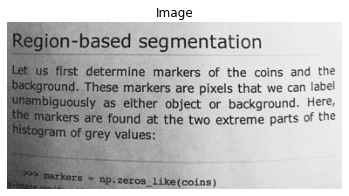

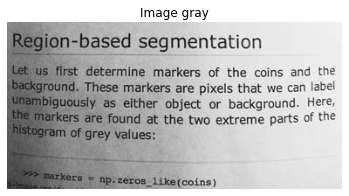

In [4]:
print('img shape:', img.shape)
print('img_gray shape:', img_gray.shape)
show_image(img)
plt.show()
show_image(img_gray, title='Image gray')
plt.show()

### OTSU global thresholding

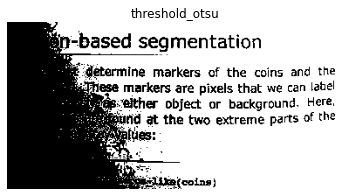

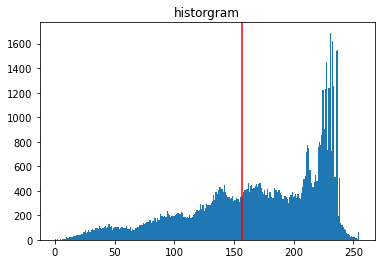

In [5]:
global_thresh = filters.threshold_otsu(img_gray)
otsu_coffee = img_gray > global_thresh
show_image(otsu_coffee, 'threshold_otsu')
plt.show()
show_histogram(img_gray, thresh=global_thresh)
plt.show()

### Local thresholding

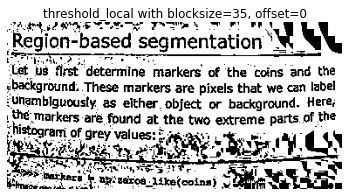

In [6]:
block_size = 35
local_thresh = filters.threshold_local(img_gray, block_size,)# offset=.1 ,method='gaussian')
local_coffee = img_gray > local_thresh
show_image(local_coffee, f'threshold_local with blocksize={block_size}, offset=0')

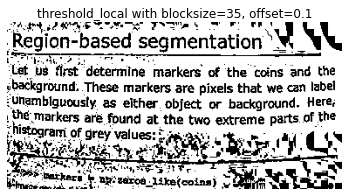

In [7]:
offset = 0.1
local_thresh_offset = filters.threshold_local(img_gray, block_size, offset=offset)
local_coffee_offset = img_gray > local_thresh_offset
show_image(local_coffee_offset, f'threshold_local with blocksize={block_size}, offset={offset}')

#### Local thresholding with other methods

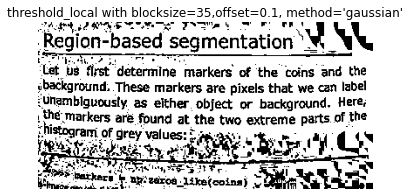

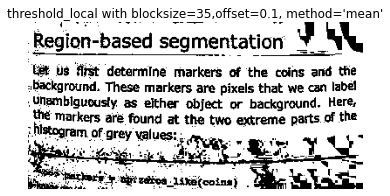

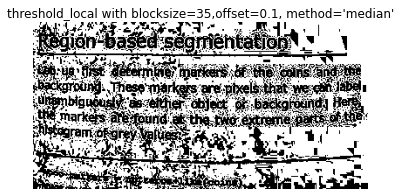

In [8]:
def gallary_threshold_local(img: np.ndarray) -> None:
    for method in ['gaussian', 'mean', 'median']:
        thresh = filters.threshold_local(img_gray, block_size, offset=offset, method=method)
        filtered = img_gray > thresh
        show_image(filtered, f'threshold_local with blocksize={block_size},'
               +f'offset={offset}, method=\'{method}\'')
        plt.show()

gallary_threshold_local(img=img_gray)

### Try some thresholding methods

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


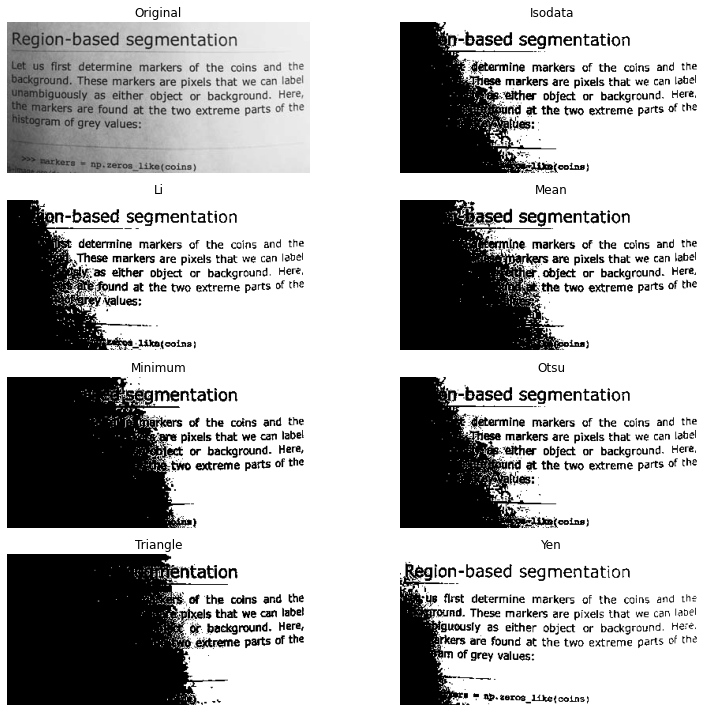

In [9]:
fig, ax = filters.try_all_threshold(img_gray, figsize=(12, 10))